### <center> Backward Projecting Canopies onto Raw UAV Images </center>
##### EasyIDP: https://easyidp.readthedocs.io/en/latest/index.html

In [1]:
import easyidp as idp

In [2]:
lotus = idp.data.Lotus()

In [3]:
roi = idp.ROI(lotus.shp, name_field='plot_id')

[shp][proj] Use projection [WGS 84] for loaded shapefile [plots.shp]


Read shapefile [plots.shp]: 100%|██████████| 112/112 [00:00<00:00, 3999.23it/s]


In [4]:
roi

<easyidp.ROI> with 112 items
[0]	N1W1
array([[139.54052962,  35.73475194],
       [139.54055106,  35.73475596],
       [139.54055592,  35.73473843],
       [139.54053438,  35.73473446],
       [139.54052962,  35.73475194]])
[1]	N1W2
array([[139.54053488,  35.73473289],
       [139.54055632,  35.73473691],
       [139.54056118,  35.73471937],
       [139.54053963,  35.73471541],
       [139.54053488,  35.73473289]])
...
[110]	S4E6
array([[139.54090456,  35.73453742],
       [139.540926  ,  35.73454144],
       [139.54093086,  35.7345239 ],
       [139.54090932,  35.73451994],
       [139.54090456,  35.73453742]])
[111]	S4E7
array([[139.54090986,  35.73451856],
       [139.54093129,  35.73452258],
       [139.54093616,  35.73450504],
       [139.54091461,  35.73450107],
       [139.54090986,  35.73451856]])

In [5]:
roi.get_z_from_dsm(lotus.metashape.dsm)

Read z values of roi from DSM [170531.Lotus_dsm.tif]: 100%|██████████| 112/112 [00:00<00:00, 153.55it/s]


In [6]:
roi # lat/long values converted here to same projection as DSM

<easyidp.ROI> with 112 items
[0]	N1W1
array([[ 368017.7565143 , 3955511.08102277,      97.39836121],
       [ 368019.70190232, 3955511.49811902,      97.39836121],
       [ 368020.11263046, 3955509.54636219,      97.39836121],
       [ 368018.15769062, 3955509.13563382,      97.39836121],
       [ 368017.7565143 , 3955511.08102277,      97.39836121]])
[1]	N1W2
array([[ 368018.20042946, 3955508.96051697,      97.31330109],
       [ 368020.14581791, 3955509.37761334,      97.31330109],
       [ 368020.55654627, 3955507.42585654,      97.31330109],
       [ 368018.601606  , 3955507.01512806,      97.31330109],
       [ 368018.20042946, 3955508.96051697,      97.31330109]])
...
[110]	S4E6
array([[ 368051.31139629, 3955486.78103425,      97.61438751],
       [ 368053.25678767, 3955487.19813795,      97.61438751],
       [ 368053.66752456, 3955485.24638299,      97.61438751],
       [ 368051.71258131, 3955484.83564713,      97.61438751],
       [ 368051.31139629, 3955486.78103425,      97.61

In [7]:
ms = idp.Metashape(lotus.metashape.project, chunk_id=0)

In [8]:
img_dict_ms = roi.back2raw(ms)

Backward roi to raw images: 100%|██████████| 112/112 [00:01<00:00, 73.92it/s]


In [9]:
# img_dict_sort = roi.back2raw(ms, save_folder="Lotus_example")

In [10]:
img_dict_ms['N1W1']

{'DJI_0479': array([[  43.91987231, 1247.04066843],
        [  69.02210471,  972.89937995],
        [ 353.25370817,  993.30409335],
        [ 328.10701395, 1267.40353337],
        [  43.91987231, 1247.04066843]]),
 'DJI_0480': array([[ 655.3678589 , 1273.01418068],
        [ 681.18303771,  996.48666626],
        [ 965.60719524, 1019.5534612 ],
        [ 939.89408899, 1296.05588135],
        [ 655.3678589 , 1273.01418068]]),
 'DJI_0481': array([[1024.43757186, 1442.10211926],
        [1043.51451282, 1159.41596975],
        [1331.67724597, 1177.40543905],
        [1312.55275283, 1460.04934703],
        [1024.43757186, 1442.10211926]]),
 'DJI_0482': array([[ 924.40250215, 2201.23504256],
        [ 942.63018066, 1910.46713446],
        [1235.98844833, 1923.81031811],
        [1217.80721094, 2214.52736107],
        [ 924.40250215, 2201.23504256]]),
 'DJI_0483': array([[ 842.898091  , 2972.20979563],
        [ 861.62293933, 2676.51568072],
        [1156.3984033 , 2686.82526811],
        [113

In [11]:
img_dict_ms['N1W1']['DJI_0479']

array([[  43.91987231, 1247.04066843],
       [  69.02210471,  972.89937995],
       [ 353.25370817,  993.30409335],
       [ 328.10701395, 1267.40353337],
       [  43.91987231, 1247.04066843]])

In [19]:
for roi_id, img_dict in img_dict_ms.items():
    for img_name, coords in img_dict.items():
        print(coords)

[[  43.91987231 1247.04066843]
 [  69.02210471  972.89937995]
 [ 353.25370817  993.30409335]
 [ 328.10701395 1267.40353337]
 [  43.91987231 1247.04066843]]
[[ 655.3678589  1273.01418068]
 [ 681.18303771  996.48666626]
 [ 965.60719524 1019.5534612 ]
 [ 939.89408899 1296.05588135]
 [ 655.3678589  1273.01418068]]
[[1024.43757186 1442.10211926]
 [1043.51451282 1159.41596975]
 [1331.67724597 1177.40543905]
 [1312.55275283 1460.04934703]
 [1024.43757186 1442.10211926]]
[[ 924.40250215 2201.23504256]
 [ 942.63018066 1910.46713446]
 [1235.98844833 1923.81031811]
 [1217.80721094 2214.52736107]
 [ 924.40250215 2201.23504256]]
[[ 842.898091   2972.20979563]
 [ 861.62293933 2676.51568072]
 [1156.3984033  2686.82526811]
 [1137.76786176 2982.49771487]
 [ 842.898091   2972.20979563]]
[[1895.43540796 2858.58650428]
 [1903.85119329 2591.56868195]
 [2167.33371661 2597.80288097]
 [2158.81809875 2865.10846104]
 [1895.43540796 2858.58650428]]
[[1922.56317388 2186.55026189]
 [1931.87582443 1925.40596005]
 [

TypeError: __init__() takes 2 positional arguments but 3 were given

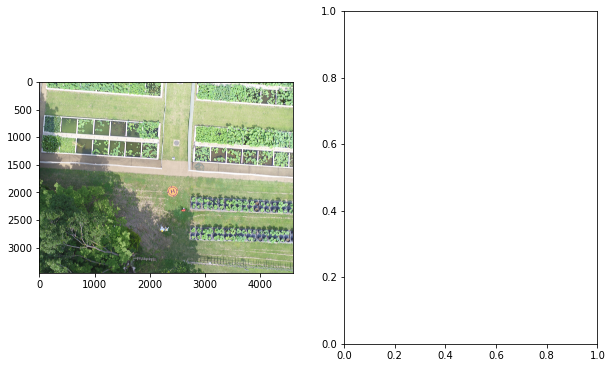

In [20]:
ms.show_roi_on_img(img_dict_ms, "N1W1", "DJI_0479")